# Project introduction for Machine Learning in Business
Working for the OilyGiant mining company I will help them to find the best place for a new well.

I will collect the oil well parameters in the selected region: oil quality and volume of reserves;
and build a model for predicting the volume of reserves in the new wells.
I will also pick the oil wells with the highest estimated values;
and pick the region with the highest total profit for the selected oil wells. -Brandi Booth

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from joblib import dump
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
# drop id column
df_0.drop('id', axis=1, inplace=True)

In [5]:
df_0.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [7]:
df_0.duplicated().sum()


0

Text(0, 0.5, 'Amount of Barrels')

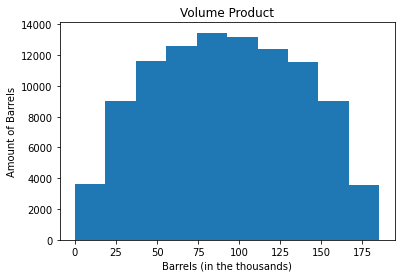

In [8]:
(df_0['product']).plot.hist()
plt.title('Volume Product')
plt.xlabel('Barrels (in the thousands)')
plt.ylabel('Amount of Barrels')


In [9]:
df_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [10]:
# drop id column
df_1.drop('id', axis=1, inplace=True)

In [11]:
df_1.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [13]:
df_1.duplicated().sum()

0

Text(0, 0.5, 'Amount of Barrels')

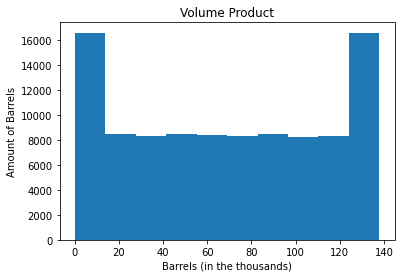

In [14]:
(df_1['product']).plot.hist()
plt.title('Volume Product')
plt.xlabel('Barrels (in the thousands)')
plt.ylabel('Amount of Barrels')


In [15]:
df_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [16]:
# drop id column
df_2.drop('id', axis=1, inplace=True)

In [17]:
df_2.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [19]:
df_2.duplicated().sum()

0

Text(0, 0.5, 'Amount of Barrels')

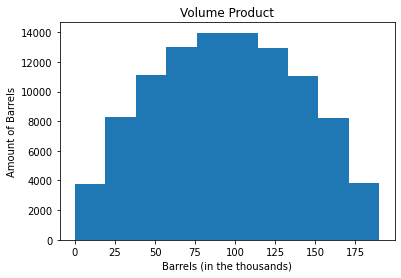

In [20]:
(df_2['product']).plot.hist()
plt.title('Volume Product')
plt.xlabel('Barrels (in the thousands)')
plt.ylabel('Amount of Barrels')


In [21]:
# for geo region 0: prep feature and target
X_0 = df_0.drop('product', axis=1)
y_0 = df_0['product']

In [22]:
# Split datasets
X_train0, X_valid0, y_train0, y_valid0 = train_test_split(X_0,y_0, test_size=0.25, random_state=42)

In [44]:
# Train and fit model, predict model on validset
model_0 = LinearRegression()
model_0.fit(X_train0, y_train0) # train model on training set
predictions_valid0 = model_0.predict(X_valid0) # get model predictions on validation set

result_0 = mean_squared_error(y_valid0 ,predictions_valid0)**0.5# calculate RMSE on validation set
print("RMSE of the linear regression model on the validation set:", result_0)

score_valid0 = model_0.score(X_valid0, y_valid0)
print(f'R2 validation set: {score_valid0}')


print('Predicted Avg Volume of reserves:',predictions_valid0.mean())

RMSE of the linear regression model on the validation set: 37.756600350261685
R2 validation set: 0.2728287328173472
Predicted Avg Volume of reserves: 92.3987999065777


For Geo region II

In [24]:
# for geo region 1: prep feature and target
X_1 = df_1.drop('product', axis=1)
y_1 = df_1['product']

In [25]:
# Split datasets
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_1,y_1, test_size=0.25, random_state=42)

In [45]:
# Train and fit model, predict model on validset
model_1 = LinearRegression()
model_1.fit(X_train1, y_train1) # train model on training set
predictions_valid1 = model_1.predict(X_valid1) # get model predictions on validation set

result_1 = mean_squared_error(y_valid1 ,predictions_valid1)**0.5# calculate RMSE on validation set
print("RMSE of the linear regression model on the validation set:", result_1)

score_valid1 = model_1.score(X_valid1, y_valid1)
print(f'R2 validation set: {score_valid1}')

print('Predicted Avg Volume of reserves:',predictions_valid1.mean())

RMSE of the linear regression model on the validation set: 0.890280100102884
R2 validation set: 0.9996245232002449
Predicted Avg Volume of reserves: 68.71287803913762


For Geo region III

In [27]:
# for geo region 2: prep feature and target
X_2 = df_2.drop('product', axis=1)
y_2 = df_2['product']

In [28]:
# Split datasets
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_2,y_2, test_size=0.25, random_state=42)

In [46]:
# Train and fit model, predict model on validset
model_2 = LinearRegression()
model_2.fit(X_train2, y_train2) # train model on training set
predictions_valid2 = model_2.predict(X_valid2) # get model predictions on validation set

result_2 = mean_squared_error(y_valid2 ,predictions_valid2)**0.5# calculate RMSE on validation set
print("RMSE of the linear regression model on the validation set:", result_2)


score_valid2 = model_2.score(X_valid2, y_valid2)
print(f'R2 validation set: {score_valid2}')

print('Predicted Avg Volume of reserves:',predictions_valid2.mean())

RMSE of the linear regression model on the validation set: 40.14587231134218
R2 validation set: 0.19634705977280464
Predicted Avg Volume of reserves: 94.77102387765939


In [ ]:
# Profit calculation
# Store all key values for calculations in separate variables
n = 500
n_best = 200
develop_wells = 200
budget = 10000*10000
price = 4.5
unit = 1000
risk_lower_than = 0.025
answer = budget/develop_wells/(price*unit)

In [33]:
print(f'The volume of reserves required to develop a new well without loss is ${answer} million dollars.')

The volume of reserves required to develop a new well without loss is $111.11111111111111 million dollars.


In [34]:
#Calculate the profit generated based on the volume of oil in a particular region
def profit(target, probabilities):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:n_best]
    return (selected.sum()* (price*unit)) - budget
print("Geo Region I profit =", profit(y_valid0, predictions_valid0))
print("Geo Region II profit =", profit(y_valid1, predictions_valid1))
print("Geo Region III profit =", profit(y_valid2, predictions_valid2))

Geo Region I profit = 33591411.14462179
Geo Region II profit = 24150866.966815114
Geo Region III profit = 25985717.59374112


In [35]:
#bootstrapping to generate a vector of how much profit can be generated based on smaller random subsets
#returns a vector of the profits of each sample (1000)
def boots_profit(target, probabilities):
    profits = []
    target = pd.Series(target).reset_index(drop=True)
    state = np.random.RandomState(42)
    for i in range(1000):
        target_subsample = target.sample(n=n, replace=True, random_state = state)
        probs_subsample = probabilities[target_subsample.index]
        profits.append(profit(target_subsample, probs_subsample))

    profits = pd.Series(profits)
    print('Wells that make a profit:',profits.gt(0).sum())
    print('Proportion of wells that make a profit:', profits.gt(0).sum()/len(profits))
    return profits

Wells that make a profit: 940
Proportion of wells that make a profit: 0.94
0      5.717781e+06
1     -1.409139e+06
2      3.720045e+06
3      2.902819e+06
4      5.377739e+06
           ...     
995    5.236050e+06
996    7.141804e+06
997    1.479849e+05
998    9.782804e+05
999    4.729670e+05
Length: 1000, dtype: float64


Wells that make a profit: 985
Proportion of wells that make a profit: 0.985
0      6.910317e+06
1      5.176808e+06
2      6.189421e+06
3     -1.166331e+06
4      6.889169e+06
           ...     
995    2.543889e+06
996    8.286800e+06
997    4.334622e+06
998    6.417695e+06
999    4.620119e+06
Length: 1000, dtype: float64


Wells that make a profit: 920
Proportion of wells that make a profit: 0.92
0     -2.791058e+05
1      1.870398e+06
2      3.279223e+06
3      1.688161e+06
4      5.657033e+06
           ...     
995    5.395811e+06
996    6.378069e+06
997    1.506469e+06
998    6.988740e+06
999    2.871870e+06
Length: 1000, dtype: float64



/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

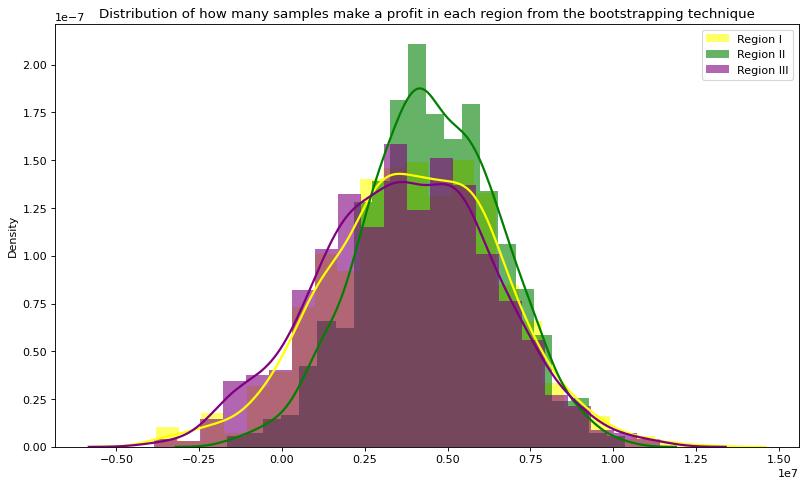

In [36]:
# profit from each region

boots0 = boots_profit(y_valid0, predictions_valid0)
print(boots0)
print()
print()
boots1 = boots_profit(y_valid1, predictions_valid1)
print(boots1)
print()
print()
boots2 = boots_profit(y_valid2, predictions_valid2)
print(boots2)
print()


# distribution plot
kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(boots0, color='yellow', label='Region I', **kwargs)
sns.distplot(boots1, color='green', label='Region II', **kwargs)
sns.distplot(boots2, color='purple', label='Region III', **kwargs)
plt.title('Distribution of how many samples make a profit in each region from the bootstrapping technique')
plt.legend();

In [37]:
#function takes -> output of the bootstrap profits ->gives confidence interval, avg profit & risk of loss for region
def ninetyfive_int(profits):
    confidence_i = st.t.interval(0.95, len(profits)-1, profits.mean(), profits.sem())
    risk = len(profits[profits < 0]) / len(profits)
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    print('The average profit for this region is: ',profits.mean())
    print('The 95% confidence interval is:', confidence_i[0], ',' ,confidence_i[1] )
    print('The risk of losses is', risk)
    print('Confidence interval from the quantile method:', lower, ',',upper)

In [38]:
print("Geo Region I:")
ninetyfive_int(boots0)
print()
print("Geo Region II:")
ninetyfive_int(boots1)
print()
print("Geo Region III:")
ninetyfive_int(boots2)

Geo Region I:
The average profit for this region is:  3995754.780542297
The 95% confidence interval is: 3834659.446179576 , 4156850.1149050174
The risk of losses is 0.06
Confidence interval from the quantile method: -1104678.9533197111 , 8974603.27717879

Geo Region II:
The average profit for this region is:  4520488.909064583
The 95% confidence interval is: 4393369.211915222 , 4647608.606213943
The risk of losses is 0.015
Confidence interval from the quantile method: 616844.7965422687 , 8453401.775073847

Geo Region III:
The average profit for this region is:  3750099.0291532897
The 95% confidence interval is: 3587346.7982884464 , 3912851.260018133
The risk of losses is 0.08
Confidence interval from the quantile method: -1447667.2730489261 , 8883904.035342218


<div class="alert alert-info">
    <h2>Conclusion</h2>
        <p>In this project we check which region is the best our oil company to make investment.  We find that our quality models evaluated and got satisfactory info in our "R2"(R-squared) metrics in each region we checked in our model. We find that vol reserve is sufficient for develop a new well without lossess is 111.11.

The bootstrapping testing gave a better insight to investment that our oil company should make, we find that all three regions our good in profit prediction, yet the one with the lower risk to loss is Geo region II.

Therefore, we recommend that our company invest the most resources in region II of all the three we examined and start to dig the first 200 wells there for best results in profits.</p>
</div>


